In [2]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'gensim'

In [2]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [3]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [4]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

In [5]:
model.wv['ankara']

array([-0.01713789, -0.19981287,  0.17935814, -0.41452876, -0.22132507,
        0.39991388, -0.437382  , -0.19259703, -0.48269582, -0.10319461,
       -0.13135321,  0.14372037,  0.06963418, -0.05263345,  0.06606705,
        0.50431776, -0.20493741,  0.45692664,  0.08121797, -0.1873696 ,
       -0.45283002,  0.10599947,  0.0756357 ,  0.0247144 , -0.05963039,
        0.31326294,  0.20030794,  0.9030002 , -0.21842991,  0.00306219,
       -0.60865045,  0.18435813, -0.62829006,  0.5799973 , -0.4299905 ,
       -0.33662936,  0.16913733,  0.6430857 , -0.2891774 ,  0.6905184 ,
       -0.2370844 ,  0.11151572,  0.07527554,  0.18899089,  0.30619732,
        0.2984146 , -0.26598257, -0.19739728,  0.08041582,  0.62913096,
       -0.4843196 , -0.7916862 , -0.01315893,  0.37172568,  0.3951959 ,
       -0.38316822, -0.26318488, -0.27902168, -0.08983667,  0.13084306,
       -0.26015407, -0.2630091 ,  0.5897087 , -0.10736108,  0.21157001,
        0.11689346, -0.368579  , -0.15846595,  0.3223501 , -0.04

In [8]:
model.wv.most_similar('youtube')

C:\Users\Maynard\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('twitter', 0.7461193799972534),
 ('twıtter', 0.7367117404937744),
 ('internete', 0.7224974632263184),
 ('paylaşım', 0.7152854204177856),
 ('whatsapp', 0.7063167095184326),
 ('sitelerine', 0.7028395533561707),
 ('facebook', 0.7012866139411926),
 ('yayınlandıktan', 0.6828365325927734),
 ('sayfasına', 0.679084300994873),
 ('sitelerinin', 0.6733880043029785)]

In [9]:
model.save('word2vec.model')

In [10]:
model = Word2Vec.load('word2vec.model')

In [13]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

C:\Users\Maynard\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


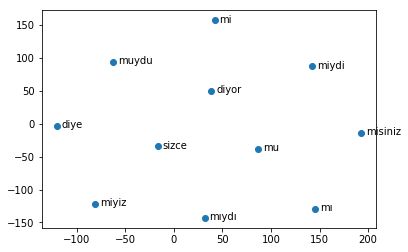

In [19]:
closestwords_tsneplot(model, 'mu')